***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

***Loading Data***

In [2]:
X,Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

***Visualization***

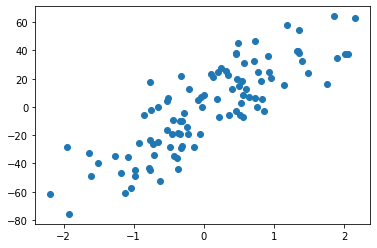

In [3]:
plt.scatter(X, Y)
plt.show()

***Splitting Test Train Data***

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

***Creating Model Class***

In [5]:
class GDLR:
    def __init__(self, alpha, epochs):
        self.m = 100
        self.b = 20
        self.epoches = epochs
        self.alpha = alpha

    def fit(self,X_train,Y_train):
        for i in range(self.epoches):
            loss_slope_m = -2 * np.sum((Y_train - self.m*X_train.ravel() - self.b)* X_train.ravel())
            loss_slope_b = -2 * np.sum(Y_train - self.m*X_train.ravel() - self.b)
            
            self.b = self.b - (self.alpha * loss_slope_b)
            self.m = self.m - (self.alpha * loss_slope_m)
        return self.m, self.b
        
    def predict(self,X_test):
        return X_test*self.m + self.b

***Training the model***

In [6]:
model = GDLR(0.002, 100)
model.fit(X_train, Y_train)

(26.80068782760811, -2.7827117701662627)

***Visualizing the final result***

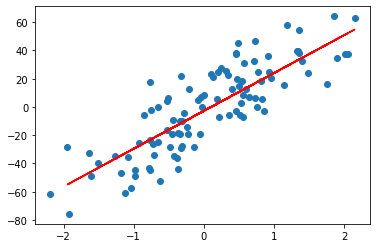

In [7]:
plt.scatter(X, Y)
plt.plot(X_train, model.predict(X_train), 'r-')
plt.show()